In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans, AgglomerativeClustering
import re

In [3]:
data = pd.read_csv('data_with_clusters.csv')
data['VORP'] = data['VORP'].round(1)
data.columns

Index(['Unnamed: 0', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Column1', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Salary', 'Offensive Archetype', 'Pos', 'LEBRON', 'O-LEBRON',
       'D-LEBRON', 'Wins Added', 'BOXLEBRON', 'BOXOLEBRON', 'BOXDLEBRON',
       'Arch Num', 'Pos_Num', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%', 'TRB',
       'AST', 'STL', 'BLK', 'PTS', 'k5cls', 'k4cls', 'k3cls', 'k8cls'],
      dtype='object')

In [4]:
data[data['Player'] == 'Nikola Jokic']

,Unnamed: 0,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,TRB,AST,STL,BLK,PTS,k5cls,k4cls,k3cls,k8cls
298,298,Nikola Jokic,25.0,60,2115,31.1,0.644,0.183,0.274,9.5,...,0.858,11.0,8.7,1.4,0.6,26.2,2,1,1,4


In [5]:
cluster_variables = [
    'Player',
    'Pos',
    'PER',
    'BOXLEBRON',
    'BPM',
    'USG%',
    'AST%',
    'VORP',
    'WS/48',
    'Salary',
    'k5cls',
    '3PM'
]

In [6]:
mod_df = data[cluster_variables]
mod_df = mod_df.drop_duplicates()
mod_df.head()

,Player,Pos,PER,BOXLEBRON,BPM,USG%,AST%,VORP,WS/48,Salary,k5cls
0,Aaron Gordon,PF,15.233333,0.10,0.633333,20.933333,18.3,0.5,0.074667,18136364.0,1
1,Aaron Holiday,PG,8.800000,-2.56,-4.400000,19.900000,12.8,-0.6,0.004000,2345640.0,3
2,Aaron Nesmith,SF,6.400000,-2.39,-4.700000,12.900000,3.9,-0.3,0.030000,3458400.0,0
3,Abdel Nader,SF,13.400000,-1.29,-0.400000,18.900000,7.4,0.2,0.102000,1752950.0,3
4,Al Horford,C,17.500000,1.16,3.300000,21.800000,20.0,1.0,0.104000,27500000.0,1


### PG

In [7]:
pg = mod_df[mod_df['Pos'] == 'PG']
pg.head()

,Player,Pos,PER,BOXLEBRON,BPM,USG%,AST%,VORP,WS/48,Salary,k5cls
1,Aaron Holiday,PG,8.800000,-2.56,-4.400000,19.900000,12.800000,-0.6,0.004,2345640.0,3
8,Alex Caruso,PG,10.900000,-0.54,-0.200000,13.900000,16.600000,0.5,0.100,2750000.0,3
28,Ben Simmons,PG,18.000000,2.18,2.300000,20.800000,31.500000,1.8,0.137,29250000.0,4
34,Brad Wanamaker,PG,9.533333,-1.45,-4.733333,17.933333,24.433333,-0.4,0.029,2250000.0,3
37,Brandon Goodwin,PG,10.600000,-1.47,-2.600000,19.400000,20.900000,-0.1,0.039,1701593.0,0


In [8]:
pg.BOXLEBRON.mean()

0.18458333333333338

In [9]:
pg.BPM.mean()

-0.27268518518518525

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


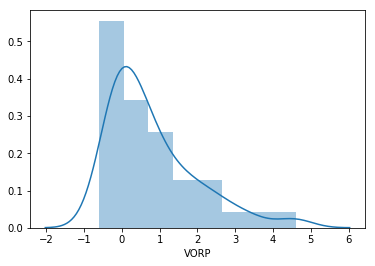

In [10]:
sns.distplot(pg['VORP'])

In [32]:
pg['VORP'].mean()

0.7986111111111109

### SG

In [11]:
sg = mod_df[mod_df['Pos'] == 'SG']
sg.head()

,Player,Pos,PER,BOXLEBRON,BPM,USG%,AST%,VORP,WS/48,Salary,k5cls
6,Alec Burks,SG,14.600000,-0.20,0.800000,20.900000,13.000000,0.8,0.126,6000000.0,1
16,Andre Roberson,SG,4.200000,-0.48,-6.200000,11.600000,7.400000,-0.1,-0.043,152839.0,0
18,Anfernee Simons,SG,12.600000,-1.34,-1.300000,19.600000,12.400000,0.1,0.070,2252040.0,3
20,Anthony Edwards,SG,12.900000,-2.47,-3.400000,27.100000,13.800000,-0.7,-0.006,9757440.0,4
23,Austin Rivers,SG,9.633333,-2.06,-3.766667,14.933333,12.366667,-0.1,0.073,3174603.0,3


In [12]:
sg.BOXLEBRON.mean()

-0.9548913043478262

In [13]:
sg.BPM.mean()

-2.196014492753623

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


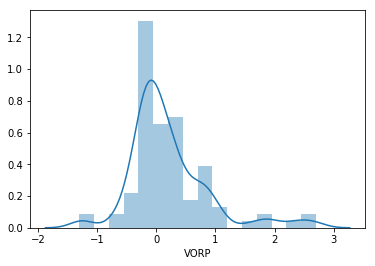

In [14]:
sns.distplot(sg['VORP'])

In [31]:
sg['VORP'].mean()

0.20652173913043478

### SF

In [15]:
sf = mod_df[mod_df['Pos'] == 'SF']
sf.head()

,Player,Pos,PER,BOXLEBRON,BPM,USG%,AST%,VORP,WS/48,Salary,k5cls
2,Aaron Nesmith,SF,6.4,-2.39,-4.7,12.9,3.9,-0.3,0.030,3458400.0,0
3,Abdel Nader,SF,13.4,-1.29,-0.4,18.9,7.4,0.2,0.102,1752950.0,3
11,Alfonzo McKinnie,SF,15.2,-1.06,-0.6,17.1,4.1,0.1,0.161,1762796.0,0
15,Andre Iguodala,SF,9.8,-0.79,-0.3,11.4,14.0,0.5,0.072,15000000.0,0
38,Brandon Ingram,SF,20.0,1.28,2.5,28.3,22.3,2.2,0.128,27285000.0,2


In [16]:
sf.BOXLEBRON.mean()

-0.5239682539682541

In [17]:
sf.BPM.mean()

-1.3935185185185184

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


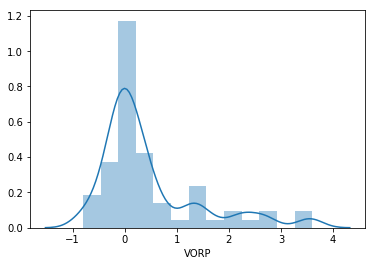

In [19]:
sns.distplot(sf['VORP'])

In [30]:
sf['VORP'].mean()

0.4571428571428571

### PF

In [20]:
pf = mod_df[mod_df['Pos'] == 'PF']
pf.head()

,Player,Pos,PER,BOXLEBRON,BPM,USG%,AST%,VORP,WS/48,Salary,k5cls
0,Aaron Gordon,PF,15.233333,0.10,0.633333,20.933333,18.300000,0.5,0.074667,18136364.0,1
5,Al-Farouq Aminu,PF,5.733333,-0.62,-7.033333,13.000000,8.966667,-0.1,-0.029000,9720900.0,0
7,Aleksej Pokusevski,PF,6.400000,-2.17,-5.700000,19.900000,12.600000,-0.8,-0.076000,2964840.0,3
12,Alize Johnson,PF,22.300000,-0.08,2.300000,20.000000,10.800000,0.1,0.182000,399591.0,3
17,Andrew Wiggins,PF,14.500000,-0.23,-0.800000,23.100000,10.600000,0.6,0.070000,29542010.0,4


In [21]:
pf.BOXLEBRON.mean()

-0.45686046511627915

In [22]:
pf.BPM.mean()

-2.0186046511627898

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


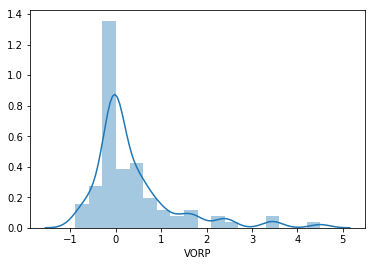

In [23]:
sns.distplot(pf['VORP'])

In [29]:
pf['VORP'].mean()

0.3813953488372092

### C

In [24]:
c = mod_df[mod_df['Pos'] == 'C']
c.head()

,Player,Pos,PER,BOXLEBRON,BPM,USG%,AST%,VORP,WS/48,Salary,k5cls
4,Al Horford,C,17.500000,1.16,3.300000,21.8,20.000000,1.0,0.104000,27500000.0,1
9,Alex Len,C,12.233333,0.11,-2.300000,15.1,6.833333,0.1,0.072667,4032648.0,0
13,Andre Drummond,C,18.500000,1.30,-1.133333,27.7,13.833333,0.2,0.066667,29546311.0,1
22,Aron Baynes,C,9.800000,-1.86,-5.200000,16.1,6.800000,-0.8,0.043000,6975610.0,3
25,Bam Adebayo,C,22.800000,2.20,4.800000,24.2,27.300000,3.1,0.196000,5115492.0,4


In [25]:
c.BOXLEBRON.mean()

0.4501351351351351

In [26]:
c.BPM.mean()

-0.14009009009009016

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


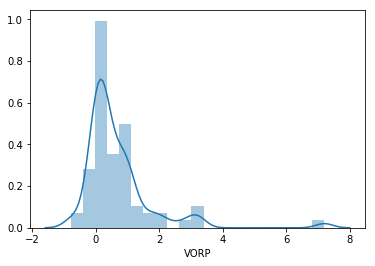

In [27]:
sns.distplot(c['VORP'])

In [28]:
c['VORP'].mean()

0.672972972972973

In [34]:
pd.merge(mod_df[['Player', 'VORP']].sort_values('VORP', ascending=False)[:10], mod_df[['Player', 'Pos']], on='Player')

,Player,VORP,Pos
0,Nikola Jokic,7.2,C
1,Stephen Curry,4.6,PG
2,Giannis Antetokounmpo,4.5,PF
3,Luka Doncic,4.5,PG
4,Kawhi Leonard,3.6,SF
5,Zion Williamson,3.5,PF
6,Jimmy Butler,3.5,SF
7,Julius Randle,3.4,PF
8,Damian Lillard,3.4,PG
9,LeBron James,3.4,PG


## Edges by Position

In [22]:
def pos_edges(df, results_table):
    source = []
    target = []
    for i in range(len(df)):        
        player1 = df.iloc[i]
        
        for j in range(len(df)):            
            player2 = df.iloc[j] 
            
            if abs(player1.VORP - player2.VORP) <= 0.25:
                source.append(player1.Player)
                target.append(player2.Player)

    results_table['source'] = source
    results_table['target'] = target

### PG

In [25]:
pg_box = pg[['Player', 'BOXLEBRON']]
pg_box.head()

,Player,BOXLEBRON
1,Aaron Holiday,-2.56
8,Alex Caruso,-0.54
28,Ben Simmons,2.18
34,Brad Wanamaker,-1.45
37,Brandon Goodwin,-1.47


In [26]:
pg_vorp = pg[['Player', 'VORP']]
pg_vorp.head()

,Player,VORP
1,Aaron Holiday,-0.6
8,Alex Caruso,0.5
28,Ben Simmons,1.8
34,Brad Wanamaker,-0.4
37,Brandon Goodwin,-0.1


In [27]:
pg_edges = pd.DataFrame(columns=['source', 'target'])
pg_edges

,source,target


In [28]:
min_vorp = pg.VORP.min()
max_vorp = pg.VORP.max()
print(f'min_vorp: {min_vorp}, max_vorp: {max_vorp}')

min_vorp: -0.6, max_vorp: 4.6


In [29]:
pos_edges(pg_vorp, pg_edges)

In [30]:
pg_edges.head()

,source,target
0,Aaron Holiday,Aaron Holiday
1,Aaron Holiday,Brad Wanamaker
2,Aaron Holiday,Coby White
3,Aaron Holiday,Killian Hayes
4,Alex Caruso,Alex Caruso


### SG

In [29]:
sg_box = sg[['Player', 'BOXLEBRON']]
sg_box.head()

,Player,BOXLEBRON
6,Alec Burks,-0.20
16,Andre Roberson,-0.48
18,Anfernee Simons,-1.34
20,Anthony Edwards,-2.47
23,Austin Rivers,-2.06


In [31]:
sg_vorp = sg[['Player', 'VORP']]
sg_vorp.head()

,Player,VORP
6,Alec Burks,0.8
16,Andre Roberson,-0.1
18,Anfernee Simons,0.1
20,Anthony Edwards,-0.7
23,Austin Rivers,-0.1


In [32]:
sg_edges = pd.DataFrame(columns=['source', 'target'])
sg_edges

,source,target


In [33]:
min_vorp = sg.VORP.min()
max_vorp = sg.VORP.max()
print(f'min_vorp: {min_vorp}, max_vorp: {max_vorp}')

min_vorp: -1.3, max_vorp: 2.7


In [34]:
pos_edges(sg_vorp, sg_edges)

In [35]:
sg_edges.head()

,source,target
0,Alec Burks,Alec Burks
1,Alec Burks,Collin Sexton
2,Alec Burks,Delon Wright
3,Alec Burks,Derrick White
4,Alec Burks,Donte DiVincenzo


### SF

In [36]:
sf_box = sf[['Player', 'BOXLEBRON']]
sf_box.head()

,Player,BOXLEBRON
2,Aaron Nesmith,-2.39
3,Abdel Nader,-1.29
11,Alfonzo McKinnie,-1.06
15,Andre Iguodala,-0.79
38,Brandon Ingram,1.28


In [37]:
sf_vorp = sf[['Player', 'VORP']]
sf_vorp.head()

,Player,VORP
2,Aaron Nesmith,-0.3
3,Abdel Nader,0.2
11,Alfonzo McKinnie,0.1
15,Andre Iguodala,0.5
38,Brandon Ingram,2.2


In [38]:
sf_edges = pd.DataFrame(columns=['source', 'target'])
sf_edges

,source,target


In [39]:
min_vorp = sf.VORP.min()
max_vorp = sf.VORP.max()
print(f'min_vorp: {min_vorp}, max_vorp: {max_vorp}')

min_vorp: -0.8, max_vorp: 3.6


In [40]:
pos_edges(sf_vorp, sf_edges)

In [41]:
sf_edges.head()

,source,target
0,Aaron Nesmith,Aaron Nesmith
1,Aaron Nesmith,CJ Elleby
2,Aaron Nesmith,Caleb Martin
3,Aaron Nesmith,Cam Reddish
4,Aaron Nesmith,Cedi Osman


### PF

In [42]:
pf_box = pf[['Player', 'BOXLEBRON']]
pf_box.head()

,Player,BOXLEBRON
0,Aaron Gordon,0.10
5,Al-Farouq Aminu,-0.62
7,Aleksej Pokusevski,-2.17
12,Alize Johnson,-0.08
17,Andrew Wiggins,-0.23


In [43]:
pf_vorp = pf[['Player', 'VORP']]
pf_vorp.head()

,Player,VORP
0,Aaron Gordon,0.5
5,Al-Farouq Aminu,-0.1
7,Aleksej Pokusevski,-0.8
12,Alize Johnson,0.1
17,Andrew Wiggins,0.6


In [44]:
pf_edges = pd.DataFrame(columns=['source', 'target'])
pf_edges

,source,target


In [45]:
min_vorp = pf.VORP.min()
max_vorp = pf.VORP.max()
print(f'min_vorp: {min_vorp}, max_vorp: {max_vorp}')

min_vorp: -0.9, max_vorp: 4.5


In [46]:
pos_edges(pf_vorp, pf_edges)

In [47]:
pf_edges.head()

,source,target
0,Aaron Gordon,Aaron Gordon
1,Aaron Gordon,Andrew Wiggins
2,Aaron Gordon,Daniel Gafford
3,Aaron Gordon,Danilo Gallinari
4,Aaron Gordon,Doug McDermott


### C

In [48]:
c_box = c[['Player', 'BOXLEBRON']]
c_box.head()

,Player,BOXLEBRON
4,Al Horford,1.16
9,Alex Len,0.11
13,Andre Drummond,1.30
22,Aron Baynes,-1.86
25,Bam Adebayo,2.20


In [49]:
c_vorp = c[['Player', 'VORP']]
c_vorp.head()

,Player,VORP
4,Al Horford,1.0
9,Alex Len,0.1
13,Andre Drummond,0.2
22,Aron Baynes,-0.8
25,Bam Adebayo,3.1


In [50]:
c_edges = pd.DataFrame(columns=['source', 'target'])
c_edges

,source,target


In [51]:
min_vorp = c.VORP.min()
max_vorp = c.VORP.max()
print(f'min_vorp: {min_vorp}, max_vorp: {max_vorp}')

min_vorp: -0.8, max_vorp: 7.2


In [52]:
pos_edges(c_vorp, c_edges)

In [53]:
c_edges.head()

,source,target
0,Al Horford,Al Horford
1,Al Horford,Bobby Portis
2,Al Horford,Brook Lopez
3,Al Horford,Christian Wood
4,Al Horford,DeAndre Jordan


In [54]:
pos_edges = pd.concat([pg_edges, sg_edges, sf_edges, pf_edges, c_edges])
pos_edges

,source,target
0,Aaron Holiday,Aaron Holiday
1,Aaron Holiday,Brad Wanamaker
2,Aaron Holiday,Coby White
3,Aaron Holiday,Killian Hayes
4,Alex Caruso,Alex Caruso
...,...,...
1449,Vincent Poirier,Onyeka Okongwu
1450,Vincent Poirier,Robin Lopez
1451,Vincent Poirier,Thon Maker
1452,Vincent Poirier,Udoka Azubuike


## Edges by VORP

In [55]:
def box_VORP_edges(df, results_table):
    source = []
    target = []
    for i in range(len(df)):        
        player1 = df.iloc[i]
        
        for j in range(len(df)):            
            player2 = df.iloc[j]            

            if abs(player1.VORP - player2.VORP) <= 0.25:
                source.append(player1.Player)
                target.append(player2.Player)

    results_table['source'] = source
    results_table['target'] = target

In [56]:
vorp_edges = pd.DataFrame(columns=['source', 'target'])

In [57]:
box_VORP_edges(data, vorp_edges)

In [59]:
all_edges = pd.concat([pos_edges, vorp_edges])
all_edges = all_edges.drop_duplicates()
all_edges

,source,target
0,Aaron Holiday,Aaron Holiday
1,Aaron Holiday,Brad Wanamaker
2,Aaron Holiday,Coby White
3,Aaron Holiday,Killian Hayes
4,Alex Caruso,Alex Caruso
...,...,...
42354,Zion Williamson,Damian Lillard
42355,Zion Williamson,Jimmy Butler
42356,Zion Williamson,Joel Embiid
42358,Zion Williamson,Kawhi Leonard


In [60]:
all_edges.to_csv('vorp_pos_edges.csv')

In [61]:
vorp_edges.to_csv('vorp_edges.csv')

In [62]:
pos_edges.to_csv('pos_edges.csv')

### 1976 Edges

In [40]:
old_players = pd.read_csv('old_players.csv')
old_players.head()

,Unnamed: 0,Player,TRB,AST,STL,BLK,PTS,VORP,Pos
0,0,Aaron James,3.6,1.1,0.4,0.1,10.9,0.1,SF
1,1,Adrian Dantley,7.6,1.9,1.2,0.2,20.3,2.5,SF
2,2,Al Eberhard,3.3,0.7,0.7,0.2,6.9,-0.2,SF
3,3,Al Skinner,4.6,3.7,1.3,0.7,12.6,1.1,SG
4,4,Alex English,2.8,0.4,0.3,0.3,5.2,0.0,SF


In [41]:
def box_VORP_edges(df, results_table):
    source = []
    target = []
    for i in range(len(df)):        
        player1 = df.iloc[i]
        
        for j in range(len(df)):            
            player2 = df.iloc[j]            

            if abs(player1.VORP - player2.VORP) <= 0.25:
                source.append(player1.Player)
                target.append(player2.Player)

    results_table['source'] = source
    results_table['target'] = target

In [44]:
edges_1976 = pd.DataFrame(columns=['source', 'target'])

In [45]:
box_VORP_edges(old_players, edges_1976)

In [47]:
edges_1976.to_csv('edges_1976.csv')